# Exercise 2: Associative memory

## 2.1 Forming the correlation matrix directly

In this part of the exercise we will use the direct approach in forming the correlation matrix. Memory based on the correlation matrix should memorize input-output association pairs represented as vectors. For each input vector (key) the memory has to memorize the output pattern i.e. vector in an ASCII code formulation. In this example we will use 4-dimensional input and output vectors. Words (output vectos) that have to be memorized are: '*vrat*' , '*kraj*' , '*cres*' , '*otac*'. Vectors $b_i$, which represent those words should be formed as follows:

In [15]:
import numpy as np

real=lambda x: np.array([[ord(character) for character in x]]).T  # .T -> transpose

b1=real("vrat")
b2=real("kraj")
b3=real("cres")
b4=real("otac")

print(b1, '\n\n', b2)

[[118]
 [114]
 [ 97]
 [116]] 

 [[107]
 [114]
 [ 97]
 [106]]


### 2.1.1 Orthogonal input vectors

This experiment demonstrates how to create an associative memory. Ortonormalized set of vectors defined as below

In [16]:
a1 = np.array([[1, 0, 0, 0]]).T
a2 = np.array([[0, 1, 0, 0]]).T
a3 = np.array([[0, 0, 1, 0]]).T
a4 = np.array([[0, 0, 0, 1]]).T

print(a1)
print(a1.T)

[[1]
 [0]
 [0]
 [0]]
[[1 0 0 0]]


is used as input vector set (set of keys). We form the memory correlation matrix $\mathbf{M}$ using input output pairs as follows:

In [17]:
M = b1 * a1.T + b2 * a2.T + b3 * a3.T + b4 * a4.T
print(M)
print(b1 * a1.T)
print(b2 * a2.T)

[[118 107  99 111]
 [114 114 114 116]
 [ 97  97 101  97]
 [116 106 115  99]]
[[118   0   0   0]
 [114   0   0   0]
 [ 97   0   0   0]
 [116   0   0   0]]
[[  0 107   0   0]
 [  0 114   0   0]
 [  0  97   0   0]
 [  0 106   0   0]]


In order to verify whether the memory is functioning properly, we have to calculate outputs for each input vector. For example, the output for the key $a_1$ can be obtained as follows:

In [18]:
char=lambda x:"".join(map(chr, map(int, list(x))))

word=char(M@a1)
print(word)

print(M@a1)
print(list(M@a1))
print(list(map(int, list(M@a1))))

vrat
[[118]
 [114]
 [ 97]
 [116]]
[array([118]), array([114]), array([97]), array([116])]
[118, 114, 97, 116]


**Tasks**

1. What is the response for each key? Were all input-output pairs memorized correctly?
  - Each key memorized the correct word in the correct order of characters
2. How many input-output pairs would be memorized if vectors $a_i$ were not normalized?
  - The same amount of pairs would be memorized, 4, but not with the correct characters as the input $b_i$


In [19]:
for k in [a1, a2, a3, a4]:
    print(k.T, char(M@k))

[[1 0 0 0]] vrat
[[0 1 0 0]] kraj
[[0 0 1 0]] cres
[[0 0 0 1]] otac


### 2.1.2 Correlation matrix properties

The goal of this experiment is to demonstrate the capacity of obtained memory. In this part of the exercise we will try to memorize one more (fifth) word ('*mrak*'). In 4-dimensional vector space the maximum number of linearly independent vectors is four. Because of this fact, we pick an arbitrary unit vector as the fifth key, for example:

In [20]:
a5 = (a1 + a3) / np.sqrt(2)
a5

array([[0.70710678],
       [0.        ],
       [0.70710678],
       [0.        ]])

Form vectors $b_5$ ('*mrak*') and $a_5$ as explained and add them into the memory using the following expression:

In [21]:
b5 = real("mrak")
M_five = b1 * a1.T + b2 * a2.T + b3 * a3.T + b4 * a4.T + b5 * a5.T
M_five

array([[195.07463915, 107.        , 176.07463915, 111.        ],
       [194.61017306, 114.        , 194.61017306, 116.        ],
       [165.58935778,  97.        , 169.58935778,  97.        ],
       [191.66042559, 106.        , 190.66042559,  99.        ]])

**Tasks**

1. Was the new association properly memorized?
2. Did other associations stay correctly memorized?
    - If not - which were not memorized correctly and why?
    - If yes - which were memorized correctly and why?

**Answer** : The new association was not correctly memorized and the 1º and 3º associations were affected. Since $a_5$ used values from $a_1$ and $a_3$, these were affected because there was an overlap of values 

In [22]:
for k in [a1, a2, a3, a4]:
    before=char(M@k)
    after=char(M_five@k)
    print(k.T, before, after)

print(a5.T, char(M_five@a5))

[[1 0 0 0]] vrat ÃÂ¥¿
[[0 1 0 0]] kraj kraj
[[0 0 1 0]] cres °Â©¾
[[0 0 0 1]] otac otac
[[0.70710678 0.         0.70710678 0.        ]] ĆēíĎ


### 2.1.3 Word pairs as associations

In this experiment we will form the associative memory, which memorizes word pairs. The associations, which have to be memorized are: *ruka*-*vrat*, *kset*-*kraj*, *more*-*cres*, *mama*-*otac*. Generate input vectors (keys) as follows:

In [28]:
a1 = real("ruka")
a2 = real("kset")
a3 = real("more")
a4 = real("mama")
print(b1, a1.T)
M = b1 * a1.T + b2 * a2.T + b3 * a3.T + b4 * a4.T
print(M)
print(a1)

[[118]
 [114]
 [ 97]
 [116]] [[114 117 107  97]]
[[47791 47867 46818 44624]
 [50264 50354 49352 47048]
 [43019 43124 42263 40271]
 [47892 48130 47019 44766]]
[[114]
 [117]
 [107]
 [ 97]]


Vectors bi don't have to be created again because they are the ones used in the first part of the exercise. Form the matrix M using the same procedure as in the first part of the exercise.

**Tasks**

1. What is the response for each input key?
2. Which associations were memorized correctly?
3. Which associations were not memorized correctly and why?
4. How can we fix this problem?

**Answer** : The mapping from matrix values to words is not working correctly, is the access `M@k` working correctly? 

In [30]:
print(M)

for k in [a1, a2, a3, a4]:
    print(k)
    print(M@k)
    print(list(M@k))
    print(list(map(int, list(M@k))))
    print(list(map(chr, map(int, list(M@k)))))
    print(k, char(M@k))

[[47791 47867 46818 44624]
 [50264 50354 49352 47048]
 [43019 43124 42263 40271]
 [47892 48130 47019 44766]]
[[114]
 [117]
 [107]
 [ 97]]
[[20386667]
 [21465834]
 [18378102]
 [20464233]]
[array([20386667]), array([21465834]), array([18378102]), array([20464233])]
[20386667, 21465834, 18378102, 20464233]


ValueError: ignored

### 2.1.4 Input vector orthogonalization

In this experiment we show an associative memory, which uses keys that are orthonormalized. We use the Gram-Schmidt orthogonalization method as follows. We first form the matrix $\mathbf{A}$ using vectors $a_i$:

In [33]:
print(a1, a2)
A=np.hstack([a1, a2, a3, a4])
A

[[114]
 [117]
 [107]
 [ 97]] [[107]
 [115]
 [101]
 [116]]


array([[114, 107, 109, 109],
       [117, 115, 111,  97],
       [107, 101, 114, 109],
       [ 97, 116, 101,  97]])

After this step we perform the orthonormalization step:

In [35]:
from scipy.linalg import orth
C=orth(A.T)
C

array([[-0.50594743,  0.14847022, -0.77925491, -0.33872641],
       [-0.50939047, -0.83525837,  0.19795538, -0.06065043],
       [-0.50546797,  0.25257838,  0.01775974,  0.8248581 ],
       [-0.47858195,  0.46530012,  0.59435684, -0.44854773]])

We extract individual orthonormal vectors $c_i$:

In [37]:
c1=np.array([C[0]]).T
c2=np.array([C[1]]).T
c3=np.array([C[2]]).T
c4=np.array([C[3]]).T
print(c1, c2)

[[-0.50594743]
 [ 0.14847022]
 [-0.77925491]
 [-0.33872641]] [[-0.50939047]
 [-0.83525837]
 [ 0.19795538]
 [-0.06065043]]


In the next step we form a new matrix $\mathbf{M}$ using vectors $c_i$ instead of vectors $a_i$ when creating the matrix $\mathbf{M}$. Verify the responses of matrix $\mathbf{M}$ with vectors $c_i$ as inputs:

In [38]:
M = b1 * c1.T + b2 * c2.T + b3 * c3.T + b4 * c4.T
for c in [c1, c2, c3, c4]:
    print(c.T, char(M@c))

[[-0.50594743  0.14847022 -0.77925491 -0.33872641]] vrat
[[-0.50939047 -0.83525837  0.19795538 -0.06065043]] kraj
[[-0.50546797  0.25257838  0.01775974  0.8248581 ]] cres
[[-0.47858195  0.46530012  0.59435684 -0.44854773]] otac


**Tasks**

1. What is the effect of vector orthonormalization?
  - instead of using the $a_i$ as keys, the orthonormalization allowed the use od the words as keys and no result was lost
2. How many pairs were correctly memorized?
  - All of the pairs were memorized
3. What can we expect when normalizing the vectors?
  - The length of the vector becomes 1, how does it affect in this case? 
4. What can we expect when only orthogonalizing the vectors?
  - ?
5. What can we expect if vectors $c_i$ are linearly independent but not orthogonal?
  - ?


### 2.1.5 Finding the correlation matrix using matrix inversion

For previously used word pairs (*ruka*-*vrat*, *kset*-*kraj*, *more*-*cres*, *mama*-*otac*) find a $4\times 4$ correlation matrix $\mathbf{M}$ as $\mathbf{M} = \mathbf{B}\mathbf{A}^{-1}$, where matrix $\mathbf{B}$ is defined as:

In [42]:
B=np.hstack([b1, b2, b3, b4])
M=B@np.linalg.inv(A)
print(B)
print(M)

[[118 107  99 111]
 [114 114 114 116]
 [ 97  97 101  97]
 [116 106 115  99]]
[[ 2.61453831 -0.42249469 -1.18860108 -0.03551725]
 [ 0.86259171 -0.29902568  0.16622243  0.33881185]
 [ 0.11877619  0.02550434  0.55198385  0.220755  ]
 [-0.34587034  1.00278743  0.66319844 -0.33875405]]


**Tasks**

1. Were all associations properly memorized? Remark: The result should be rounded to the nearest number before comparison.
  - 👍

In [43]:
for a in [a1, a2, a3, a4]:
    print(a.T, char(np.round(M@a)))

[[114 117 107  97]] vrat
[[107 115 101 116]] kraj
[[109 111 114 101]] cres
[[109  97 109  97]] otac


### 2.1.6 Finding the correlation matrix using pseudo-inversion

A pseudo-inverse matrix can be used in order to find the correlation matrix when number of associations is larger than dimensionality of vectors representing the associations. In this case, the correlation matrix can be found as $\mathbf{M} = \mathbf{B}\mathbf{A}^{+}$, where $\mathbf{A}^{+}$ is a pseudo-inverse matrix defined as $\mathbf{A}^{+} = \mathbf{A}^{T}(\mathbf{A}\mathbf{A}^{T})^{-1}$.

Assume that the vectors $a_i$ and $b_i$ are defined previously (five associations in total). Find the pseudo-inverse matrix for this case.

In [45]:
a1 = np.array([[1, 0, 0, 0]]).T
a2 = np.array([[0, 1, 0, 0]]).T
a3 = np.array([[0, 0, 1, 0]]).T
a4 = np.array([[0, 0, 0, 1]]).T

a5 = (a1 + a3) / np.sqrt(2)

A=np.hstack([a1, a2, a3, a4, a5])
B=np.hstack([b1, b2, b3, b4, b5])
A_pseudo=A.T@np.linalg.inv(A@A.T)
M=B@A_pseudo
M

array([[102.28731957, 107.        ,  83.28731957, 111.        ],
       [ 97.30508653, 114.        ,  97.30508653, 116.        ],
       [ 81.79467889,  97.        ,  85.79467889,  97.        ],
       [ 96.08021279, 106.        ,  95.08021279,  99.        ]])

**Tasks**

1. Were all pairs memorized correctly?
  - 👎
2. If not, what is the error between expected and obtained values?

In [46]:
for a in [a1, a2, a3, a4, a5]:
    print(a.T, char(np.round(M@a)))

[[1 0 0 0]] faR`
[[0 1 0 0]] kraj
[[0 0 1 0]] SaV_
[[0 0 0 1]] otac
[[0.70710678 0.         0.70710678 0.        ]] w


## 2.2 Finding the correlation matrix using supervised learning

This experiment shows us how to form the matrix $\mathbf{M}$ using supervised learning. In two following experiments we will use learning with error correction.

### 2.2.1 Learning with error correction

Form matrices $\mathbf{A}$ and $\mathbf{B}$ where each contains 4 vectors stacked in columns as explained in previous experiments. Check the contents of obtained matrices with following operations:

In [49]:
a1=real("ruka")
a2=real("kset")
a3=real("more")
a4=real("mama")

b1=real("vrat")
b2=real("kraj")
b3=real("cres")
b4=real("otac")

A=np.hstack([a1, a2, a3, a4])
B=np.hstack([b1, b2, b3, b4])

print(A)
print(B)

[[114 107 109 109]
 [117 115 111  97]
 [107 101 114 109]
 [ 97 116 101  97]]
[[118 107  99 111]
 [114 114 114 116]
 [ 97  97 101  97]
 [116 106 115  99]]


In order to start the learning procedure we have to initialize the matrix $\mathbf{M}$ (For example, random values uniformly generated in $[-0.5, 0.5]$ interval):

In [52]:
M=np.random.rand(4, 4)-0.5
M

array([[ 0.10340715, -0.34718907,  0.45996189, -0.48378838],
       [-0.14107392, -0.05889564,  0.15942351, -0.35241228],
       [ 0.31459892,  0.47414906, -0.09389527, -0.2935198 ],
       [ 0.44755673,  0.16477304, -0.18850851, -0.43144381]])

For the learning part use the function *trainlms*, which is the implementation of the Widrow-Hoff LMS learning algorithm. The function can be used as follows:

In [53]:
def trainlms(A, B, M, ni, max_num_iter, min_err=0.02):
    d=B
    x=A
    w=M
    
    n=0
    err=[]
    while (n<max_num_iter):
        n+=1
        e=d-w@x
        w+=ni*np.dot(e, x.T)
        err.append(np.sum(np.sum(np.multiply(e, e))))
        if (err[-1]<min_err):
            break
    return w, err

where *max_num_iter* is the number of iterations and *ni* is the learning rate. Find the *max_num_iter* variable experimentally. For *ni* you can use:

In [54]:
ni=0.9999/np.linalg.eig(A @ A.T)[0].max()

The function trainlms performs the learning until SSE drops below $0.02$ or maximum number of iterations is performed. After the learning phase, look at the responses of the correlation matrix $\mathbf{M}$:

In [55]:
M, e=trainlms(A, B, M, ni, 100000)

If we type

In [56]:
np.round(M@A)==B

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

we will see, which characters were properly reconstructed: the positions with correct reconstructions will have value *True* and  other positions will have value *False*. By calling the *trainlms* multiple times we can extend the learning process and maybe increase the number of memorized characters but the proper way to extend the learning process is to increase the *max_num_iter* variable. We can draw a graph, which plots the error with number of iterations (in logaritmic scale) using the following commands:

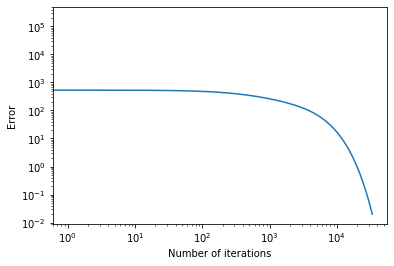

In [57]:
import matplotlib.pyplot as plt

plt.plot(e)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Number of iterations")
plt.ylabel("Error")
plt.show()

**Tasks**

1. Plot a graph showing number of memorized characters tied to number of used iterations. (Caution: When building the graph, start the simulation with the same starting matrix.)

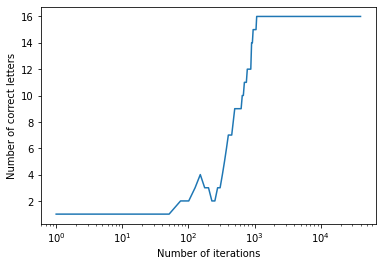

In [58]:
num_letters=[]
M_initial=np.random.rand(4, 4)-0.5
for i in range(1, 40000, 25):
    M, e=trainlms(A, B, M_initial, ni, i)
    num_letters.append(np.sum(np.round(np.dot(M, A))==B))

plt.plot(list(range(1, 40000, 25)), num_letters)
plt.xscale("log")
plt.xlabel("Number of iterations")
plt.ylabel("Number of correct letters")
plt.show()

## 2.2.2 Effect of larger number of associations

This experiment demonstrates the capacity of the associative memory. What is the capacity of a $4\times 4$ correlation matrix based associative memory?

For additional pair '*auto*'-'*mrak*' create vectors $a_5$ and $b_5$ as explained in the previous part of the exercise. Create new matrices A and B with dimensions $4$ (rows) $\times$ $5$ (columns) in the same way as previously explained. Initialize the matrix $\mathbf{M}$ with random starting values.

In [73]:
a5=real("auto")
b5=real("mrak")

A=np.hstack([a1, a2, a3, a4, a5])
B=np.hstack([b1, b2, b3, b4, b5])

M=np.random.rand(4, 4)-0.5
M

array([[ 0.43603083,  0.21604405, -0.33504546, -0.47479466],
       [-0.45426593, -0.14361941,  0.18577217,  0.05638448],
       [-0.30975743,  0.39012044,  0.29935984,  0.18050994],
       [ 0.06162536, -0.48925912,  0.09518692, -0.14626995]])

Use the *trainlms* function in the following way:

[[False False False False False]
 [False  True False False False]
 [False  True False False False]
 [False False False False False]]
2


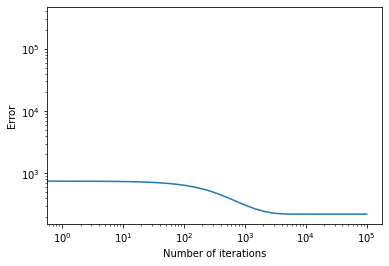

In [74]:
ni=0.9999/max(np.linalg.eig(np.dot(A, A.T))[0])
M, e=trainlms(A, B, M, ni, 100000)

print(np.round(np.dot(M, A))==B)
print(np.sum(np.round(np.dot(M, A))==B))

## Error by number of iterations
plt.plot(e)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Number of iterations")
plt.ylabel("Error")
plt.show()

**Tasks**

1. How many iterations did you use?
  - Defined in the `trainlms` function
2. How many characters were memorized correctly?
  - Only 2 characters
3. What is the SSE error?
  - `219.79844711685456`
4. What happens if we call the function from the beginning?
5. How many characters are correctly memorized now and how large is the mistake? Is there any difference and why?
6. Is it possible to train this network in order to memorize all five associations?
7. Why? (Explain the previous answer)

Question 4: what is the beginning? A new starting M?